In [1]:
import pandas as pd

In [2]:
import polars as pl
import numpy as np

# General Pandas

In [3]:
df=pd.DataFrame({
    'Name' : ['Alice' , 'Bob' , 'John'] ,
    'Age' : [18 , 22 , 19] ,
    'Student' : [0 , 1 , 0] 
} , index = ['Stud 1' , 'Stud 2' , 'Stud 3'])
df

,Name,Age,Student
Stud 1,Alice,18,0
Stud 2,Bob,22,1
Stud 3,John,19,0


In [4]:
df['Student'] = df['Student'].astype(bool).map({True : 'Yes' , False : 'No'}).map({'Yes' : np.nan , 'No' : 1})

In [5]:
df

,Name,Age,Student
Stud 1,Alice,18,1.0
Stud 2,Bob,22,NaN
Stud 3,John,19,1.0


# Encoding 

# One Hot Encoding

In [6]:
pd.get_dummies(df , dtype = int)


,Age,Student,Name_Alice,Name_Bob,Name_John
Stud 1,18,1.0,1,0,0
Stud 2,22,NaN,0,1,0
Stud 3,19,1.0,0,0,1


# Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Name_encoded']= le.fit_transform(df['Name'])
df

,Name,Age,Student,Name_encoded
Stud 1,Alice,18,1.0,0
Stud 2,Bob,22,NaN,1
Stud 3,John,19,1.0,2


# Scaling Techniques

In [8]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['dummies']])
print(X_scaled)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[['dummies']])
print(X_scaled)

NameError: name 'X' is not defined

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split

df = pd.DataFrame({
    'Studyhour' : [1 , 2 , 3 , 4 , 5] ,
    'Marks' : [40 ,50 , 60 , 70 , 80]
})

s_scaler = StandardScaler()
X_scaled = s_scaler.fit_transform(df)
print(pd.DataFrame(X_scaled))

m_scaler = MinMaxScaler()
print(pd.DataFrame(m_scaler.fit_transform(df)))

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = [[1], [2] , [3], [4], [5]]
y = [30, 40 , 50, 60, 70]
model.fit(X , y)
hours = float(input("Enter the hours Studied :"))
y_pred = model.predict([[hours]]) [0]
print(f"Based on hours ({hours}) studied your marks will be {int(y_pred)}")


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
X = [[1], [2] , [3], [4], [5]]
y = [0 , 0 , 1 ,1 , 1]
model.fit(X , y)
hours = float(input("Enter the hours Studied :"))
y_pred = model.predict([[hours]]) [0]
print(f"Based on hours ({hours}) studied you are likely to PASS" if y_pred else f"Based on hours ({hours}) studied you are likely to FAIL")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
# [Weight , size]
X = [
    [180 , 7] ,
    [200 , 7.5] ,
    [250 , 8] , 
    [300 , 8.5] , 
    [330 , 9] ,
    [360 , 9.5]
]
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)
#  0 - Apple , 1 - Orange
labels = {0 :'Apple' , 1:'Orange'}
y = [0 , 0, 0 , 1 , 1 ,1 ]
model = KNeighborsClassifier(n_neighbors= 3)
model.fit(X_scaled ,y)
weight = float(input("Enter weigth in grams : "))
size = float(input("Enter size in cm :"))
y_pred = model.predict(standard_scaler.transform([[weight , size]]))[0]
'''
print(f"Based on the weight and size it is likely an Apple "
      if y_pred == 0 
      else 
      f"Based on the weight and size it is likely an Orange"
)
'''
print(f"Based on size and weight its likely an {labels[y_pred]}")

In [21]:
from sklearn.tree import DecisionTreeClassifier
# [Size , ColorShade]
X = [
    [7 , 1] ,
    [8 , 3] ,
    [10 , 8] ,
    [ 9  , 9]
]
y = [0 , 0 ,1  ,1 ]
labels = {0 : 'Apple' , 1 : 'Orange'}
model = DecisionTreeClassifier()
model.fit(X , y)
size = float(input("Enter size of the fruit :"))
shade = int(input("Enter the color grade of the fruit (0-10) :"))
y_pred = model.predict([[size , shade]])[0]
print(f"Based on color and shade it is likely an {labels[y_pred]}")


Enter size of the fruit : 230
Enter the color grade of the fruit (0-10) : 2


Based on color and shade it is likely an Apple


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

model = Pipeline([
    ('scaler' , StandardScaler()) ,
    ('knn' , KNeighborsClassifier(n_neighbors = 3))
])
X = [
    [180 , 7] ,
    [200 , 7.5] ,
    [250 , 8] , 
    [300 , 8.5] , 
    [330 , 9] ,
    [360 , 9.5]
]
y = [ 0 , 0 ,0  , 1 , 1, 1]
labels = {0 : 'Apple' , 1 : 'Orange'}
model.fit(X , y)
weight = float(input("Enter weigth in grams : "))
size = float(input("Enter size in cm :"))
y_pred = model.predict([[weight , size]])[0]
print(f"Based on size and weight its likely an {labels[y_pred]}")

# Accuarcy testing with KNN pipelining 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = Pipeline([
    ('scaler' , StandardScaler()) ,
    ('knn' , KNeighborsClassifier(n_neighbors = 3))
])
X = [
    [180 , 7] ,
    [200 , 7.5] ,
    [250 , 8] , 
    [300 , 8.5] , 
    [330 , 9] ,
    [360 , 9.5]
]
y = [ 0 , 0 ,0  , 1 , 1, 1]
X_train , X_test , y_train , y_test  = train_test_split(X , y , random_state = 42 , test_size = 0.2)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test , y_pred)
print(f"The accuaracy of the model : {acc}")
labels = {0 : 'Apple' , 1 : 'Orange'}
weight = float(input("Enter the weight in grams :"))
size = float(input("Enter the size in cms :"))
mod_pred = model.predict([[weight , size]])[0]
print(f"Based on size and weight its likely an {labels[mod_pred]}")

# Using a bigger data set as the previus DS is too small for KNN 

# Too good Overfitted has its own disadvantages can decrease the Data set values for non-ambigiuty

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = Pipeline([
    ('scaler' , StandardScaler()) ,
    ('knn' , KNeighborsClassifier(n_neighbors = 3))
])
X = [
    # ===== Apples (100) =====
    [160,6.4],[162,6.5],[164,6.6],[166,6.7],[168,6.8],
    [170,6.9],[172,7.0],[174,7.1],[176,7.2],[178,7.3],
    [180,7.4],[182,7.5],[184,7.6],[186,7.7],[188,7.8],
    [190,7.9],[192,8.0],[194,8.1],[196,8.2],[198,8.3],
    [200,8.4],[202,8.5],[204,8.6],[206,8.7],[208,8.8],
    [210,8.9],[212,9.0],[214,9.1],[216,9.2],[218,9.3],
    [165,6.6],[167,6.7],[169,6.8],[171,6.9],[173,7.0],
    [175,7.1],[177,7.2],[179,7.3],[181,7.4],[183,7.5],
    [185,7.6],[187,7.7],[189,7.8],[191,7.9],[193,8.0],
    [195,8.1],[197,8.2],[199,8.3],[201,8.4],[203,8.5],
    [205,8.6],[207,8.7],[209,8.8],[211,8.9],[213,9.0],
    [215,9.1],[217,9.2],[219,9.3],[221,9.4],[223,9.5],
    [225,9.6],[227,9.7],[229,9.8],[231,9.9],[233,10.0],
    [235,10.1],[237,10.2],[239,10.3],[241,10.4],[243,10.5],
    [245,10.6],[247,10.7],[249,10.8],[251,10.9],[253,11.0],
    [255,11.1],[257,11.2],[259,11.3],[261,11.4],[263,11.5],
    [265,11.6],[267,11.7],[269,11.8],[271,11.9],[273,12.0],
    [275,12.1],[277,12.2],[279,12.3],[281,12.4],[283,12.5],

    # ===== Oranges (100) =====
    [260,8.5],[262,8.6],[264,8.7],[266,8.8],[268,8.9],
    [270,9.0],[272,9.1],[274,9.2],[276,9.3],[278,9.4],
    [280,9.5],[282,9.6],[284,9.7],[286,9.8],[288,9.9],
    [290,10.0],[292,10.1],[294,10.2],[296,10.3],[298,10.4],
    [300,10.5],[302,10.6],[304,10.7],[306,10.8],[308,10.9],
    [310,11.0],[312,11.1],[314,11.2],[316,11.3],[318,11.4],
    [265,8.6],[267,8.7],[269,8.8],[271,8.9],[273,9.0],
    [275,9.1],[277,9.2],[279,9.3],[281,9.4],[283,9.5],
    [285,9.6],[287,9.7],[289,9.8],[291,9.9],[293,10.0],
    [295,10.1],[297,10.2],[299,10.3],[301,10.4],[303,10.5],
    [305,10.6],[307,10.7],[309,10.8],[311,10.9],[313,11.0],
    [315,11.1],[317,11.2],[319,11.3],[321,11.4],[323,11.5],
    [325,11.6],[327,11.7],[329,11.8],[331,11.9],[333,12.0],
    [335,12.1],[337,12.2],[339,12.3],[341,12.4],[343,12.5],
    [345,12.6],[347,12.7],[349,12.8],[351,12.9],[353,13.0],
    [355,13.1],[357,13.2],[359,13.3],[361,13.4],[363,13.5],
    [365,13.6],[367,13.7],[369,13.8],[371,13.9],[373,14.0],
    [375,14.1],[377,14.2],[379,14.3],[381,14.4],[383,14.5]
]


y = (
    [0] * 90+   # Apples
    [1] * 90     # Oranges
)

X_train , X_test , y_train , y_test  = train_test_split(X , y , random_state = 42 , test_size = 0.2)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test , y_pred)
print(f"The accuaracy of the model : {acc}")
labels = {0 : 'Apple' , 1 : 'Orange'}
weight = float(input("Enter the weight in grams :"))
size = float(input("Enter the size in cms :"))
mod_pred = model.predict([[weight , size]])[0]
print(f"Based on size and weight its likely an {labels[mod_pred]}")

# Import breats_cancer_data for all model testing

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()

X = pd.DataFrame(data.data , columns=[data.feature_names])
y = data.target

# Metric Errors to predict the model accuary and find the outliers or other non-relative terms

In [ ]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
import numpy as np

real_score = [90 , 60 , 80 , 100]
pred_score = [85 , 70 , 70, 95]
mae = mean_absolute_error(real_score , pred_score)
mse = mean_squared_error(real_score , pred_score)
rmse = np.sqrt(mse)
print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse.round(2)}")

# SKlearn progress 1

In [27]:
from sklearn.linear_model import LinearRegression  , LogisticRegression
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , recall_score , f1_score  , precision_score
from sklearn.metrics import mean_absolute_error , mean_squared_error 
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder  , LabelEncoder 


# Clustering

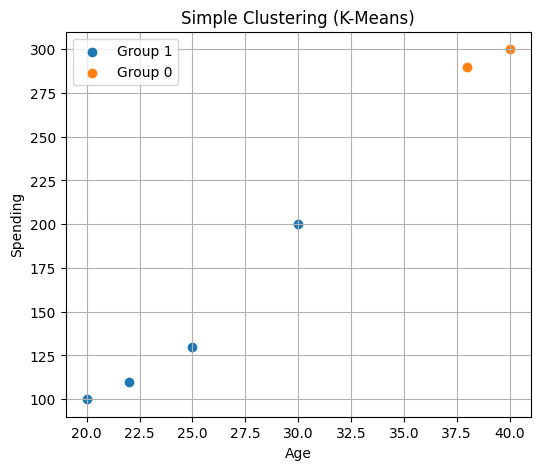

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

data = {
    'Customer' : [ 'Riya' , 'Aman' , 'Faizan' , 'Neha' , 'Imran' , 'Sneha'] ,
    'Age' : [20, 30 , 40  ,22, 38, 25] ,
    'Spending' : [ 100 , 200, 300 , 110  ,290 , 130]
}

df = pd.DataFrame(data)
X = df[['Age' , 'Spending']]
model = KMeans(n_clusters = 2 , random_state = 42 ,n_init = 10)
df['Group'] = model.fit_predict(X)
df

plt.figure(figsize = (6, 5))
for group in df['Group'].unique() :
    group_data = df[df['Group'] == group]
    plt.scatter(group_data['Age'] , group_data['Spending'] , label=f"Group {group}" )
plt.xlabel('Age')
plt.ylabel('Spending')
plt.title("Simple Clustering (K-Means)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

# Alcohol mini-p 

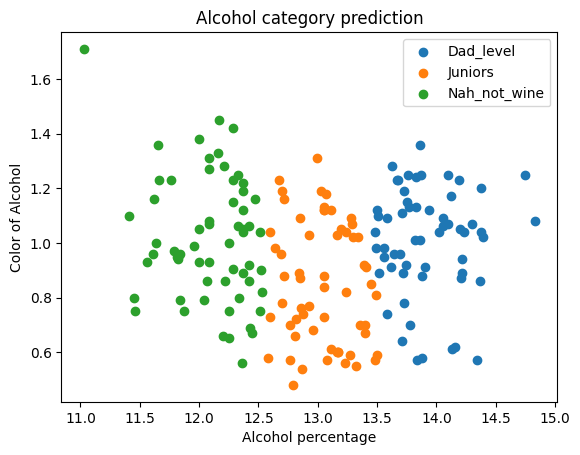

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Predict
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Dad_level
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Juniors
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Juniors
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Dad_level
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Juniors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,Dad_level
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,Juniors
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,Juniors
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,Juniors


In [61]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv('wine-clustering.csv')
X = df[['Alcohol' , "Hue"]]
model = KMeans(random_state = 42 , n_clusters = 3 , n_init = 15)
df['Predict'] = model.fit_predict(X)
label_map = {0 : 'Juniors' , 1: 'Nah_not_wine' , 2:'Dad_level'}
df['Predict'] = df['Predict'].map(label_map )
for group in df['Predict'].unique() :
    group_data = df[df['Predict'] == group] 
    plt.scatter(group_data['Alcohol'] , group_data['Hue']  ,label=group)
plt.title('Wine Quality categorizer')
plt.xlabel('Alcohol percentage')
plt.ylabel('Color of Alcohol')
plt.legend(loc='best')
plt.show()

# Experimenting by incresing the number of clusters cause WHY NOT !!!!!!!!!!!

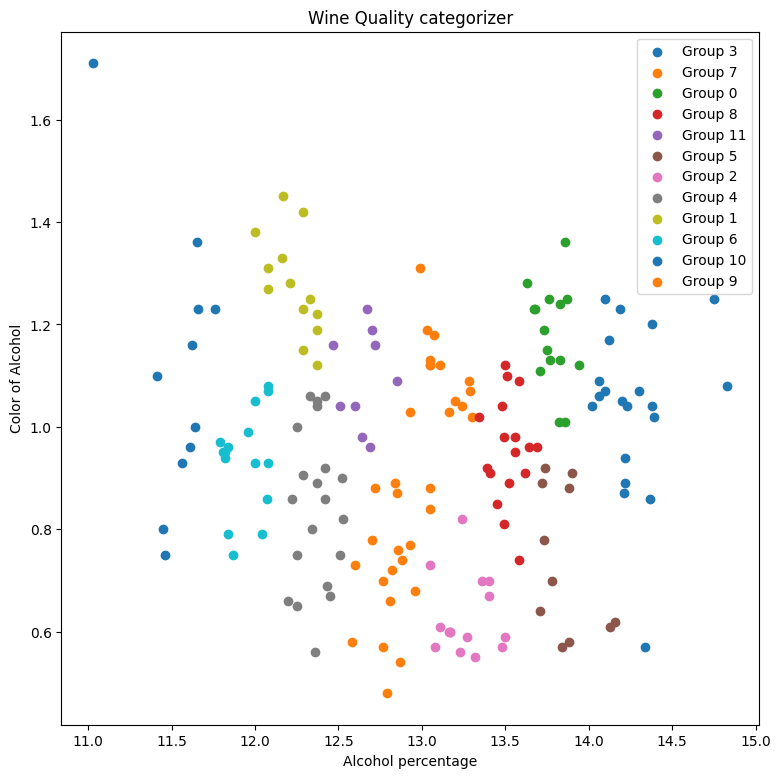

In [65]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv('wine-clustering.csv')
X = df[['Alcohol' , "Hue"]]
model = KMeans(random_state = 42 , n_clusters = 12 , n_init = 15)
df['Predict'] = model.fit_predict(X)
plt.figure(figsize=(9, 9))
for group in df['Predict'].unique() :
    group_data = df[df['Predict'] == group] 
    plt.scatter(group_data['Alcohol'] , group_data['Hue']  ,label=f"Group {group}")
plt.title('Wine Quality categorizer')
plt.xlabel('Alcohol percentage')
plt.ylabel('Color of Alcohol')
plt.legend(loc='best')
plt.show()

Variance captured by each PCA component 
[99.65  0.35]


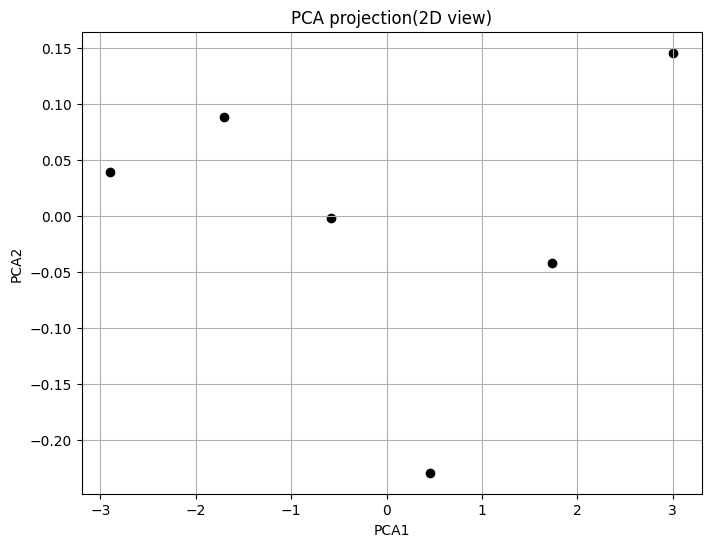

In [73]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = {
    'Age' : [25 , 30 , 35, 40 , 45 , 50] ,
    'Income' : [30000 , 40000 , 50000  , 60000 , 70000 , 80000] ,
    'Spending' : [70 , 60 ,50 , 40, 30 ,20 ] ,
    'Savings' : [1000 , 5000 , 8000 , 10000  , 15000 ,20000]
}
df = pd.DataFrame(data)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result , columns=['PCA1' ,'PCA2'])
explained_variance = pca.explained_variance_ratio_
print('Variance captured by each PCA component ')
print(np.round(explained_variance *100 , 2))

plt.figure(figsize=(8 ,6))
plt.scatter(pca_df['PCA1'] ,pca_df['PCA2'] , color='black' )
plt.title('PCA projection(2D view)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()